In [1]:
import warnings
warnings.filterwarnings('ignore')

In [287]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)

def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace() and len(t.strip('.,:;!?-\n')) > 2]

In [349]:
file_names = [
              '/Users/ssv/ml/sholohov/nahalenok.txt',   # 0
              '/Users/ssv/ml/sholohov/aleshhart.txt',   # 1
              '/Users/ssv/ml/sholohov/odinyazyk.txt',   # 2
              '/Users/ssv/ml/sholohov/felyeton.txt',    # 3
              '/Users/ssv/ml/sholohov/sudba.txt',       # 4
              '/Users/ssv/ml/sholohov/osr.txt',         # 5
              '/Users/ssv/ml/sholohov/pc.txt',          # 6
              '/Users/ssv/ml/sholohov/td1-2.txt',       # 7
              '/Users/ssv/ml/sholohov/td3-4.txt'        # 8 
             ]

In [350]:
texts = []
for file_name in file_names:
    with (open(file_name, 'r')) as file:
        texts.append(' '.join(simple_word_tokenize(file.read())))


In [327]:
(texts[0])

'снится мишке будто дед срезал саду здоровенную вишневую хворостину идет нему хворостиной машет сам строго так говорит иди сюда михайло фомич полохану тем местам откель ноги растут что дедуня спрашивает мишка что курятнике гнезда чубатой курицы все яйца покрал каруселю отнес прокатал дедуня нонешний год катался каруселях страхе кричит мишка дед степенно разгладил бороду как топнет ногой ложись постреленыш спущай портки вскрикнул мишка проснулся сердце бьется словно самом деле хворостины отпробовал чуточку открыл левый глаз хате светло утренняя зорька теплится окошком приподнял мишка голову слышит сенцах голоса мамка визжит лопочет что смехом захлебывается дед кашляет чей чужой голос протер мишка глаза видит дверь открылась хлопнула дед горницу бежит подпрыгивает очки носу него болтаются мишка сначала подумал что поп певчими пришел пасху когда приходил дед так суетился следом дедом прет горницу чужой большущий солдат черной шинели шапке лентами без козырька мамка шее него висит воет пос

In [351]:
from sklearn.feature_extraction.text import CountVectorizer

In [352]:
cv = CountVectorizer()
matrix = cv.fit_transform(texts)

In [353]:
stop_w = [x[0] for x in sorted(cv.vocabulary_.items(), key = lambda x: x[1], reverse=False)[:4]]

In [354]:
cv = CountVectorizer(stop_words=stop_w)
matrix = cv.fit_transform(texts)

In [355]:
from sklearn.metrics.pairwise import cosine_similarity
cos_m = cosine_similarity(matrix)

In [413]:
for i in range(len(cos_m[0])):
    s = ''
    for j in range(len(cos_m[0])):
        fs = str(round(cos_m[i][j], 2))
        if len(fs) < 5:
            for k in range(len(fs), 5):
                fs += ' '
        s += ' ' + fs  
    print(s)   

 1.0   0.3   0.36  0.31  0.51  0.51  0.55  0.54  0.56 
 0.3   1.0   0.23  0.23  0.35  0.35  0.37  0.39  0.37 
 0.36  0.23  1.0   0.3   0.57  0.55  0.59  0.57  0.57 
 0.31  0.23  0.3   1.0   0.47  0.45  0.49  0.46  0.47 
 0.51  0.35  0.57  0.47  1.0   0.81  0.84  0.74  0.79 
 0.51  0.35  0.55  0.45  0.81  1.0   0.85  0.78  0.83 
 0.55  0.37  0.59  0.49  0.84  0.85  1.0   0.82  0.87 
 0.54  0.39  0.57  0.46  0.74  0.78  0.82  1.0   0.94 
 0.56  0.37  0.57  0.47  0.79  0.83  0.87  0.94  1.0  


In [360]:
%matplotlib inline

In [359]:
from matplotlib import pyplot as plt
import seaborn as sns

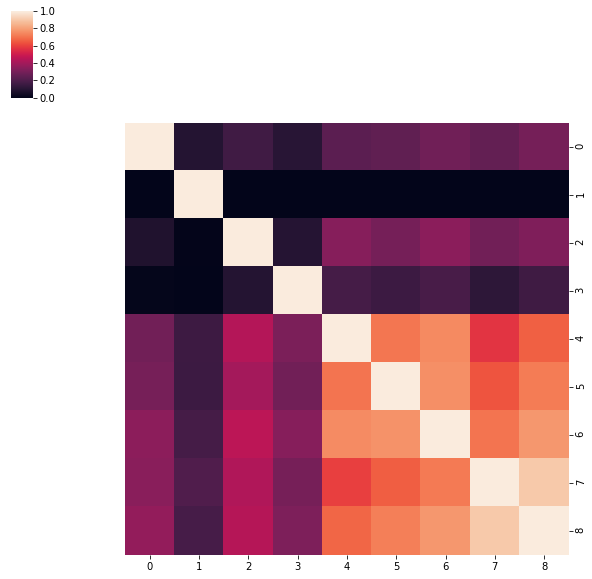

In [394]:
sns.matrix.clustermap(cos_m, col_cluster=False, row_cluster=False, standard_scale=True)

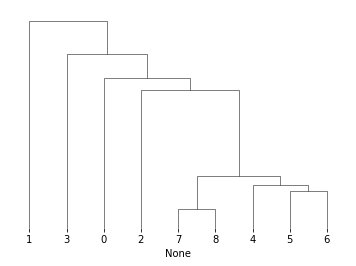

In [375]:
sns.matrix.dendrogram(cos_m)

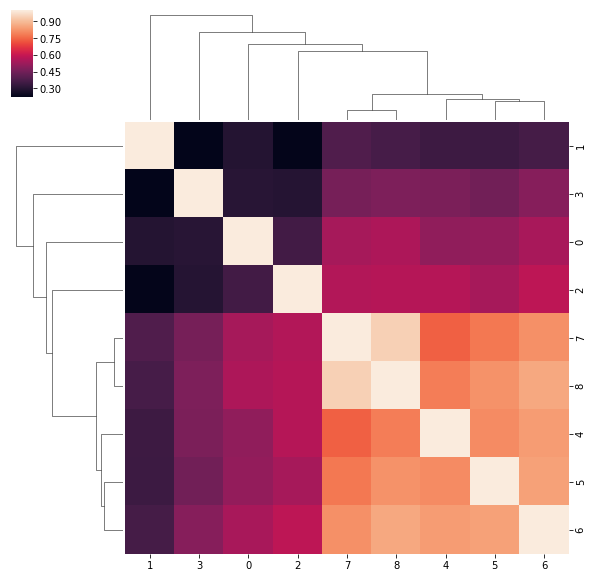

In [395]:
sns.matrix.clustermap(cos_m)

ValueError: 'vertices' must be a 2D list or array with shape Nx2